<a href="https://colab.research.google.com/github/KhuyenLE-maths/EDA_trees_Paris/blob/main/Paris_SmartCity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/AI_OpenClassroom/Project2_SmartCity/')

# I. Gathering data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('arbres-fr.csv', sep = ';')

In [ ]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Print the shape of the dataframe: 

In [ ]:
df.shape

(200137, 18)

# II. Exploratory Data Analysis
## 1. Discover type of each column:


In [ ]:
df.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [ ]:
df.dtypes.value_counts()

object     11
float64     4
int64       3
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'data type')

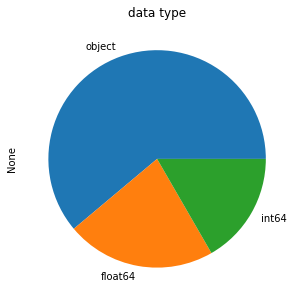

In [ ]:
plt.figure(figsize = (5,5))
df.dtypes.value_counts().plot.pie()
plt.title('data type')

## 2. Verify if the dataset contains any NaN values

In [ ]:
df.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

**Comments:** There are some columns which contain NaN values: **complement_addresse**, **numero**, **libelle_français, genre, espace, variete, stade_developpement, remarquable.** 

Remark that all values in the column **numero** are missing. The ratios of missing values on two columns **complement_addresse** and **variete** 
are 84,56% and 81,62%, respectively. Besides, the column and "id" is not really important for analyzing data. Hence, these four columns (numero, complement_addresse, variete, and id) should be dropped. 

In [ ]:
df = df.drop([complement_addresse', 'numero', 'variete', 'id'], axis = 1)

**Verify the new dataframe:**

In [ ]:
df.shape

(200137, 14)

In [ ]:
df.isna().sum()

type_emplacement           0
domanialite                1
arrondissement             0
lieu                       0
id_emplacement             0
libelle_francais        1497
genre                     16
espece                  1752
circonference_cm           0
hauteur_m                  0
stade_developpement    67205
remarquable            63098
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

### **Replace the missing values by the most frequent value corresponding to each species.**
In the case when the species has only one observation, the missing values in its columns can be replaced by the most frequent value of the corresponding column of the whole dataframe. 

In [ ]:
# First of all, we have to replace the missing values in the species column by the most frequent species.
df['espece'] = df['espece'].fillna(df['espece'].mode().iloc[0])

In [ ]:
# Determine the most frequent value corresponding to each column of the whole dataframe:
mode_columns = df.mode().iloc[0]
mode_columns

type_emplacement                                             Arbre
domanialite                                             Alignement
arrondissement                                     PARIS 15E ARRDT
lieu                   PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE
id_emplacement                                              101001
libelle_francais                                           Platane
genre                                                     Platanus
espece                                                 x hispanica
circonference_cm                                                 0
hauteur_m                                                        0
stade_developpement                                              A
remarquable                                                      0
geo_point_2d_a                                             48.7578
geo_point_2d_b                                              2.2708
Name: 0, dtype: object

Determine the set of species: 

In [ ]:
Species = list(set(df.espece))
print(len(Species))

539


In [ ]:
# Initialize the first dataframe which is corresponding to the first species:
df_0 = df[df['espece'] == Species[0]]

In [ ]:
df_0.shape

(1217, 14)

In [ ]:
df_0.isna().sum()

type_emplacement         0
domanialite              0
arrondissement           0
lieu                     0
id_emplacement           0
libelle_francais         4
genre                    0
espece                   0
circonference_cm         0
hauteur_m                0
stade_developpement    562
remarquable            218
geo_point_2d_a           0
geo_point_2d_b           0
dtype: int64

In [ ]:
Cols = df.columns

Fill the missing values in df_0:

In [ ]:
if df_0.shape[0] == 1: 
  for col in Cols:
    df_0[col] = df_0[col].fillna(df[col].mode().iloc[0])
else:
  for col in Cols:
      if len(df_0[col].mode()) == 0:
        df_0[col] = df_0[col].fillna(df[col].mode().iloc[0])
      else: 
        df_0[col] = df_0[col].fillna(df_0[col].mode().iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df_0.isna().sum()

type_emplacement       0
domanialite            0
arrondissement         0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

Do the same thing for other species, and concatenate **them with df_0.**

In [ ]:
for s in Species[1:]:
  df_1 = df[df['espece'] == s]
  # Replace missing values in this dataframe. If this dataframe has only one element or there exist a colums which contains all missing values,
  # then the missing values in this column will be replaced by the most frequent value in the completed column of the whole dataframe.  
  if df_1.shape[0] == 1:
    for col in Cols:
      df_1[col] = df_1[col].fillna(df[col].mode().iloc[0])
  else:
    for col in Cols:
      if len(df_1[col].mode()) == 0:
        df_1[col] = df_1[col].fillna(df[col].mode().iloc[0])
      else: 
        df_1[col] = df_1[col].fillna(df_1[col].mode().iloc[0])
  # concatenante df_0 and df_1
  df_0 = pd.concat([df_0, df_1], axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Verify the result:

In [ ]:
df_0.isna().sum()

type_emplacement       0
domanialite            0
arrondissement         0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

In [ ]:
df = df_0
df.isna().sum()

type_emplacement       0
domanialite            0
arrondissement         0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

Now, our dataframe has no longer NaN values. 

## Deal with outlier values:
- Identify outliers in the dataframe.
- Replace outliers in each column (if exist) by its own non-outlier maximum (or minimum) values. 

In [ ]:
df.describe()

,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,0.000919,48.854491,2.348208
std,673.190213,1971.217387,0.030307,0.030234,0.051220
min,0.000000,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,0.000000,48.835021,2.307530
50%,70.000000,8.000000,0.000000,48.854162,2.351095
75%,115.000000,12.000000,0.000000,48.876447,2.386838
max,250255.000000,881818.000000,1.000000,48.911485,2.469759


**Interquartile range (IQR):**

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

circonference_cm    85.000000
hauteur_m            7.000000
remarquable          0.000000
geo_point_2d_a       0.041426
geo_point_2d_b       0.079308
dtype: float64


**Determine the number of outliers in each column:**

In [ ]:
outliers = (df < (Q1- 1.5*IQR)) | (df > (Q3 + 1.5*IQR))

In [ ]:
outliers.sum()

arrondissement            0
circonference_cm       3409
domanialite               0
espece                    0
genre                     0
geo_point_2d_a         5641
geo_point_2d_b            0
hauteur_m              3903
id_emplacement            0
libelle_francais          0
lieu                      0
remarquable             184
stade_developpement       0
type_emplacement          0
dtype: int64

Before dealing with outliers in the dataframe, remark that: 
In the column "remarquable", since almost the trees are in non-remarkable state (as we will see in the next section), hence the value 184 in the above table indice the number of remarquable trees, not the outliers. 

In conclusion, we are going to deal with the outliers in three columns: **"circonference_cm", "hauteur_m" and "geo_point_2d_a".**

**We can also identify outliers in these three columns by box plot:**

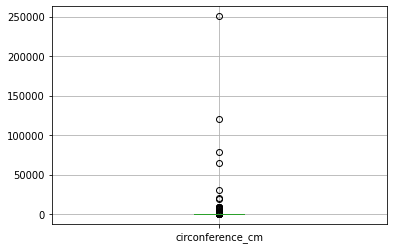

In [ ]:
df.boxplot(column = ['circonference_cm'])

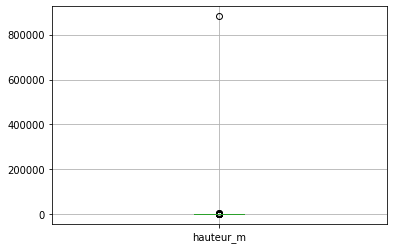

In [ ]:
df.boxplot(column = ['hauteur_m'])

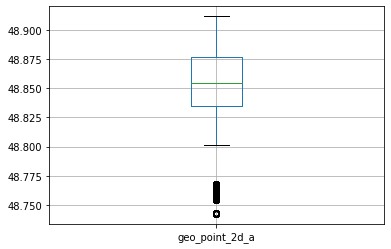

In [ ]:
df.boxplot(column= 'geo_point_2d_a')

***Comment:*** Based on the above figures, we see that the outliers in two columns "**circonference_cm**" and "**hauteur_m**" are in the upper region of their own interquartile range, while the outliers of **"geo_point_2d_a**" column are is the lower region of its IQR. 

Hence, the outliers in the two columns ("circonference_cm" and "hauteur_m") can be replaced by their own non-outlier maximum values. Similarly, the outliers in "geo_point_2d_a" column can be replaced by its non-outlier minimum value. 

In [ ]:
import numpy as np 

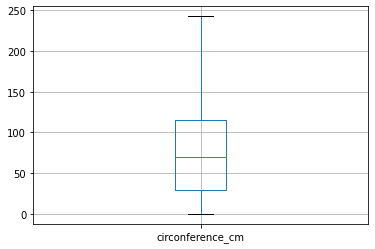

In [ ]:
# replace outliers in "circonference_cm" column by its non-outlier maximum value:
Q1_cir = df['circonference_cm'].quantile(0.25)
Q3_cir = df['circonference_cm'].quantile(0.75)
IQR = Q3_cir - Q1_cir
U_cir = [Q1_cir - 1.5*IQR, Q3_cir + 1.5*IQR]

df['circonference_cm'] = np.where(df['circonference_cm'] > U_cir[1], U_cir[1], df['circonference_cm'])
# verify the result:
df.boxplot(column = "circonference_cm")

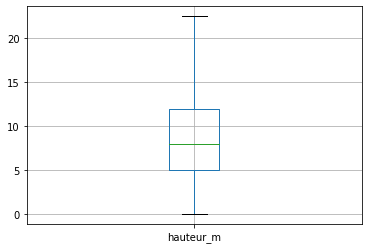

In [ ]:
# replace outliers in "hauteur_m" column by its own non-outlier maximum value:
Q1_h = df['hauteur_m'].quantile(0.25)
Q3_h = df['hauteur_m'].quantile(0.75)
IQR = Q3_h - Q1_h 
U_h = [Q1_h - 1.5*IQR, Q3_h + 1.5*IQR] 

df['hauteur_m'] = np.where(df['hauteur_m'] > U_h[1], U_h[1], df['hauteur_m'])

# verify the result:
df.boxplot(column = 'hauteur_m')

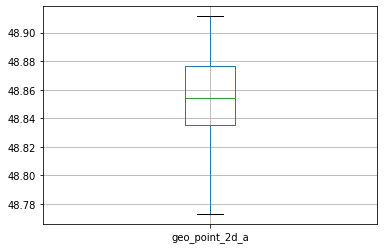

In [ ]:
# replace outliers in the "geo_point_2d_a" column by its own non-outlier minimum value.
Q1_g = df['geo_point_2d_a'].quantile(0.25)
Q3_g = df['geo_point_2d_a'].quantile(0.75)
IQR = Q3_g - Q1_g

U_g = [Q1_g - 1.5*IQR, Q3_g + 1.5*IQR]

df['geo_point_2d_a'] = np.where(df['geo_point_2d_a'] < U_g[0], U_g[0], df['geo_point_2d_a'])

# verify the result:
df.boxplot(column = 'geo_point_2d_a')

## 3. Discovery all columns of the dataframe: 

### 3.1: Column type location **(type_emplacement)** 
This column has only one value **"Arbre"**

In [ ]:
set(df.type_emplacement)

{'Arbre'}

### 3.2: Column **domanialite**
This column has 9 different categories.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


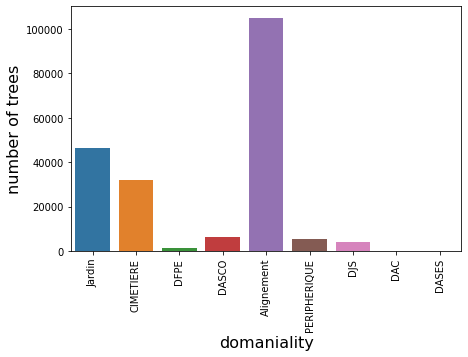

In [ ]:
plt.figure(figsize = (7,4.5))
sns.countplot(df['domanialite'])
plt.xlabel('domaniality', fontsize = 16)
plt.ylabel('number of trees', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

**Comment:** From this figure, we see that almost of trees concentrate in **"Alignement"**, the number of trees in **DAC**, **DASES**, **"DJS"** and **"DFPE"** is very small. 

Discover the most frequent species and the ratio of remarkable tree for each "domanialite".

In [ ]:
Doms = list(set(df.domanialite))

CIMETIERE
There are 31926 observations
The most frequent species is:  pseudoplatanus
The number of remarkable trees:  10.0
The ratio of remarkable trees:  0.0 %
DASES
There are 4 observations
The most frequent species is:  x hispanica
The number of remarkable trees:  0.0
The ratio of remarkable trees:  0.0 %
Jardin
There are 46263 observations
The most frequent species is:  n. sp.
The number of remarkable trees:  163.0
The ratio of remarkable trees:  0.004 %
DJS
There are 3900 observations
The most frequent species is:  n. sp.
The number of remarkable trees:  1.0
The ratio of remarkable trees:  0.0 %
DFPE
There are 1325 observations
The most frequent species is:  n. sp.
The number of remarkable trees:  0.0
The ratio of remarkable trees:  0.0 %
PERIPHERIQUE
There are 5327 observations
The most frequent species is:  nigra
The number of remarkable trees:  0.0
The ratio of remarkable trees:  0.0 %
DAC
There are 21 observations
The most frequent species is:  n. sp.
The number of remarkable 

Text(0, 0.5, 'ratio of remarkable trees')

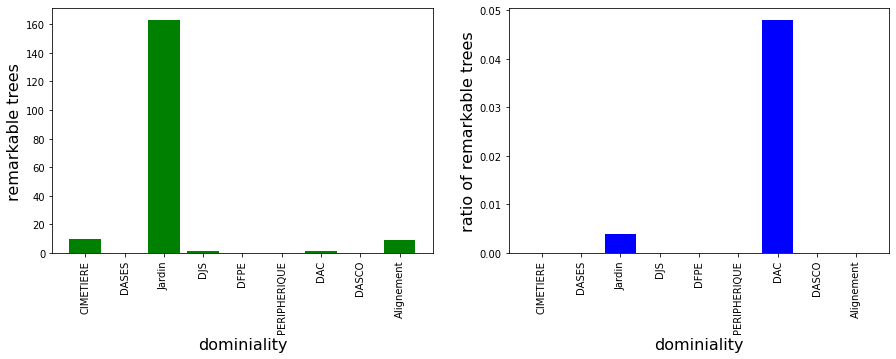

In [ ]:
remark_trees = {}
ratio_remark_trees = {}
for dom in Doms:
  if type(dom) == str:
    print(dom)
    df_t = df[df['domanialite'] == dom]
    print('There are {} observations'.format(df_t.shape[0]))
    print('The most frequent species is: ', df_t['espece'].mode().iloc[0])
    print('The number of remarkable trees: ', df_t['remarquable'].sum())
    print('The ratio of remarkable trees: ', round(df_t['remarquable'].sum()/df_t.shape[0],3), '%')
    remark_trees.update({dom: df_t['remarquable'].sum()})
    ratio_remark_trees.update({dom: round(df_t['remarquable'].sum()/df_t.shape[0],3)})

# plot the histogram of remarkable trees and its ratio corresponding to each "domanialite":
plt.figure(figsize = (15,4.5))
plt.subplot(1,2,1)
plt.bar(remark_trees.keys(), remark_trees.values(), color = 'g')
plt.xticks(rotation = 90)
plt.xlabel('dominiality', fontsize = 16)
plt.ylabel('remarkable trees', fontsize = 16)
plt.subplot(1,2,2)
plt.bar(ratio_remark_trees.keys(), ratio_remark_trees.values(), color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('dominiality', fontsize = 16)
plt.ylabel('ratio of remarkable trees', fontsize = 16)

### 3.3: Column "arrondissement": 

Print all the boroughs (arrondissements)

In [ ]:
set(df.arrondissement)

{'BOIS DE BOULOGNE',
 'BOIS DE VINCENNES',
 'HAUTS-DE-SEINE',
 'PARIS 10E ARRDT',
 'PARIS 11E ARRDT',
 'PARIS 12E ARRDT',
 'PARIS 13E ARRDT',
 'PARIS 14E ARRDT',
 'PARIS 15E ARRDT',
 'PARIS 16E ARRDT',
 'PARIS 17E ARRDT',
 'PARIS 18E ARRDT',
 'PARIS 19E ARRDT',
 'PARIS 1ER ARRDT',
 'PARIS 20E ARRDT',
 'PARIS 2E ARRDT',
 'PARIS 3E ARRDT',
 'PARIS 4E ARRDT',
 'PARIS 5E ARRDT',
 'PARIS 6E ARRDT',
 'PARIS 7E ARRDT',
 'PARIS 8E ARRDT',
 'PARIS 9E ARRDT',
 'SEINE-SAINT-DENIS',
 'VAL-DE-MARNE'}

Visualize the distribution of trees in all boroughs: 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


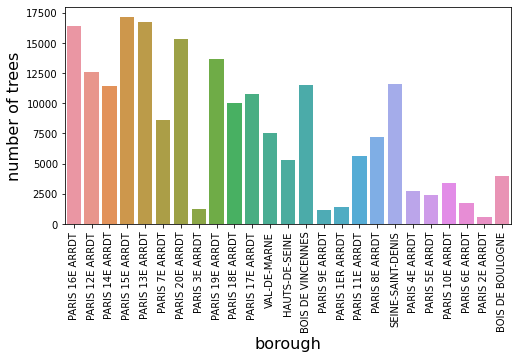

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(df['arrondissement'])
plt.xticks(rotation = 90)
plt.xlabel('borough', fontsize = 16)
plt.ylabel('number of trees', fontsize = 16)
plt.show()

From the above figure, we see that almost trees concentrate in the $7^{th}, 12^{th} \rightarrow 16^{th}$ and $19^{th}, 20^{th}$ boroughs. There is very litle of tree in the $1^{st} \rightarrow 6^{th}$ boroughs and in Hauts de seine.

Discover the most frequent species, the number and the ratio of remarkable trees in each borough:

In [ ]:
Boroughs = list(set(df['arrondissement']))
len(Boroughs)

25

PARIS 15E ARRDT
The number of trees in this boroughs is:  17151
The most frequent species in this borough is:  x hispanica
The number of remarkable trees in this borough:  7.0
The ratio of remarkable trees: 0.041 %
SEINE-SAINT-DENIS
The number of trees in this boroughs is:  11570
The most frequent species in this borough is:  hippocastanum
The number of remarkable trees in this borough:  0.0
The ratio of remarkable trees: 0.0 %
PARIS 16E ARRDT
The number of trees in this boroughs is:  16403
The most frequent species in this borough is:  x hispanica
The number of remarkable trees in this borough:  53.0
The ratio of remarkable trees: 0.323 %
PARIS 14E ARRDT
The number of trees in this boroughs is:  11399
The most frequent species in this borough is:  x hispanica
The number of remarkable trees in this borough:  10.0
The ratio of remarkable trees: 0.088 %
PARIS 20E ARRDT
The number of trees in this boroughs is:  15340
The most frequent species in this borough is:  x hispanica
The number of

Text(0, 0.5, 'ratio of remarkable trees')

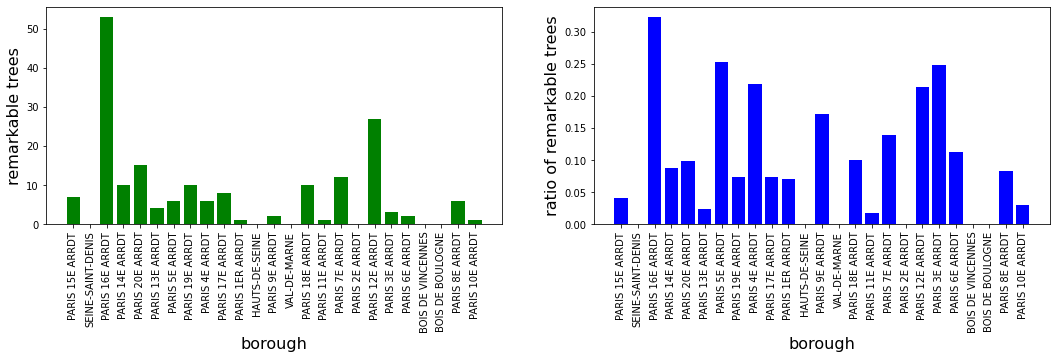

In [ ]:
remark_trees_b = {}
ratio_remark_trees_b = {}
for b in Boroughs:
  print(b)
  df_b = df[df['arrondissement'] == b]
  print('The number of trees in this boroughs is: ', df_b.shape[0])
  print('The most frequent species in this borough is: ', df_b['espece'].mode().iloc[0])
  print('The number of remarkable trees in this borough: ', df_b['remarquable'].sum())
  print('The ratio of remarkable trees:', round(df_b['remarquable'].sum()/df_b.shape[0]*100,3), '%')
  remark_trees_b.update({b: df_b['remarquable'].sum()})
  ratio_remark_trees_b.update({b: round(df_b['remarquable'].sum()/df_b.shape[0]*100,3)})

plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.bar(remark_trees_b.keys(), remark_trees_b.values(), color = 'g')
plt.xticks(rotation = 90)
plt.xlabel('borough', fontsize = 16)
plt.ylabel('remarkable trees', fontsize = 16)

plt.subplot(1,2,2)
plt.bar(ratio_remark_trees_b.keys(), ratio_remark_trees_b.values(), color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('borough', fontsize = 16)
plt.ylabel('ratio of remarkable trees', fontsize = 16)

### 3.4: Column **"libelle_français"**

**Print number of categories in this column:** 

In [ ]:
print('Number of categories is:', len(set(df.libelle_francais)))

Number of categories is: 192


In [ ]:
df.libelle_francais.value_counts()

Platane               43086
Marronnier            25352
Tilleul               21420
Erable                18469
Sophora               11820
                      ...  
Genêt                     1
Fremontia                 1
Ormeau épineux            1
Andromède                 1
Laurier des Açores        1
Name: libelle_francais, Length: 192, dtype: int64

### 3.5: Column **"genre"**

**Print number of categories in this column:**

In [ ]:
print('Number of categories: ', len(set(df.genre)))

Number of categories:  175


In [ ]:
print(df.genre.value_counts())

Platanus           42607
Aesculus           25341
Tilia              21550
Acer               18471
Sophora            11830
                   ...  
Asimina                1
Stewartia              1
Fremontodendron        1
Sciadopitys            1
Cordyline              1
Name: genre, Length: 175, dtype: int64


### 3.6: Column **"espece"**
**Print number of especes:**

In [ ]:
print('Number of especes:', len(set(df.espece)))

Number of especes: 539


In [ ]:
print(df.espece.value_counts())

x hispanica                  38161
hippocastanum                20039
japonica                     11822
n. sp.                        9063
tomentosa                     8962
                             ...  
myrtilloides                     1
americanum                       1
szechuanica var. tibetica        1
mariana                          1
x persimilis                     1
Name: espece, Length: 539, dtype: int64


### 3.7: Column **"stade_developpement"**

Visualize the distribution of development stage of trees: 

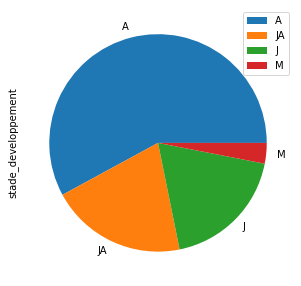

In [ ]:
plt.figure(figsize = (5,5))
df.stade_developpement.value_counts().plot.pie()
plt.legend()

### 3.8: Column **"remarquable"**

Visualize the distribution of remarkable and non-remarkale trees: 

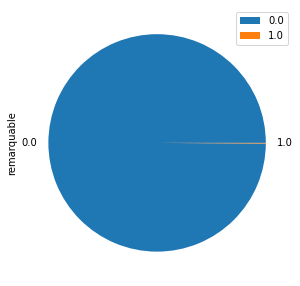

In [ ]:
plt.figure(figsize = (5,5))
df.remarquable.value_counts().plot.pie()
plt.legend()

Almost of trees are non-remarkle, there is only very small ratio of tree in the remarkable stage. 

### 3.9: Column **"circonference_cm"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


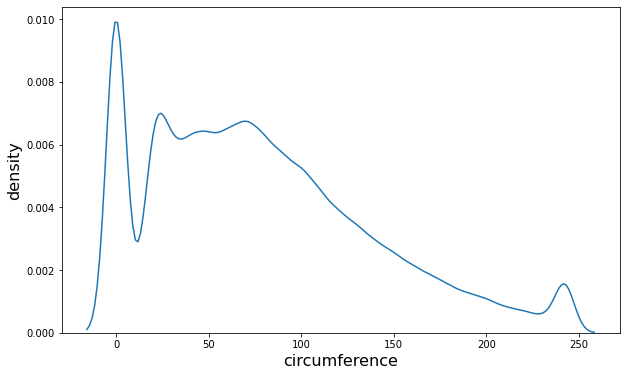

In [ ]:
plt.figure(figsize= (10,6))
sns.distplot(df['circonference_cm'], hist = False, label = 'circumference')
plt.xlabel('circumference', fontsize = 16)
plt.ylabel('density', fontsize = 16)
plt.show()

In [ ]:
circum = list(df.circonference_cm)

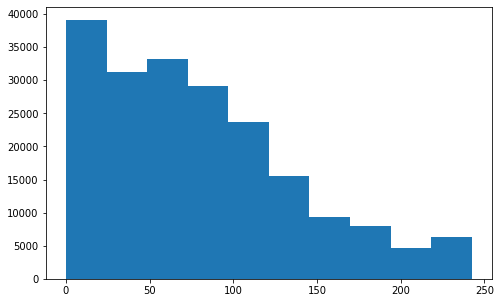

In [ ]:
# histograme of "circum":
plt.figure(figsize = (8,5))
plt.hist(circum)
plt.show() 

### 3.10: Column **"hauteur_m"**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


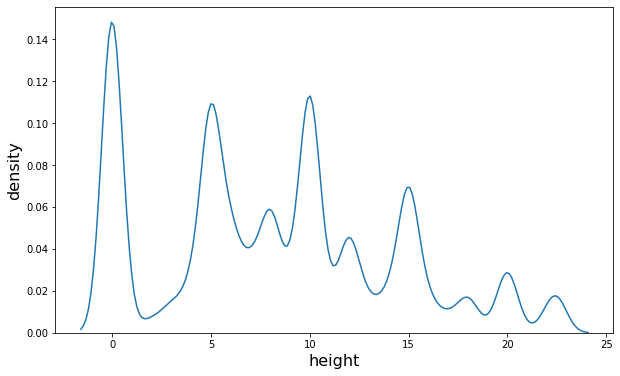

In [ ]:
plt.figure(figsize= (10,6))
sns.distplot(df['hauteur_m'], hist = False, label = 'circumference')
plt.xlabel('height', fontsize = 16)
plt.ylabel('density', fontsize = 16)
plt.show()

Visualize the histogramm of height: 

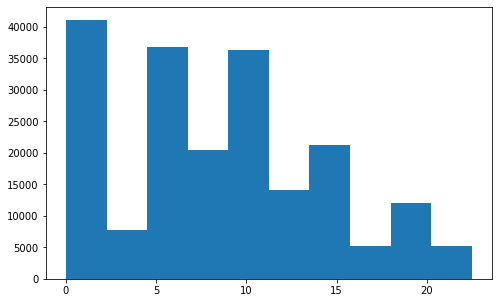

In [ ]:
plt.figure(figsize = (8,5))
plt.hist(df.hauteur_m)
plt.show()

## 6. Statistical description of the dataset:

In [ ]:
df['remarquable'].isna().sum()

0

In [ ]:
200137 - 137039

63098

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
circonference_cm,200137.0,78.888384,60.096017,0.000000,30.000000,70.000000,115.000000,242.500000
hauteur_m,200137.0,8.303615,6.062364,0.000000,5.000000,8.000000,12.000000,22.500000
remarquable,200137.0,0.000919,0.030307,0.000000,0.000000,0.000000,0.000000,1.000000
geo_point_2d_a,200137.0,48.854824,0.029246,48.772881,48.835021,48.854162,48.876447,48.911485
geo_point_2d_b,200137.0,2.348208,0.051220,2.210241,2.307530,2.351095,2.386838,2.469759


## 7. Determine the correlation of the numerical features:

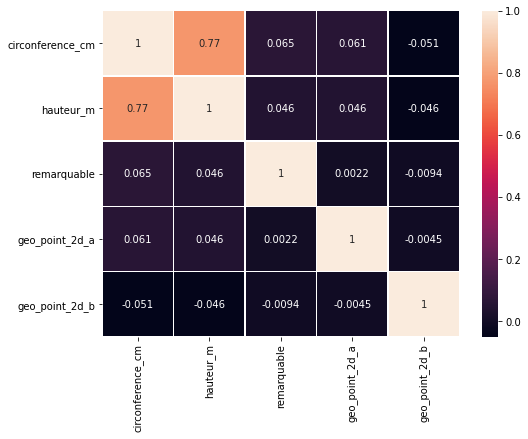

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), linewidths=0.5, annot = True)

**Remark:** The above figure shows that two variales **circonference_cm** and **hauteur_m** (circumference and height) are highly correlated together, and the maintain variables are nearly independent. 

## 8. Visualize the distribution of the circumference and height according to geographical location

**Distribution of circumference**

<Figure size 360x360 with 0 Axes>

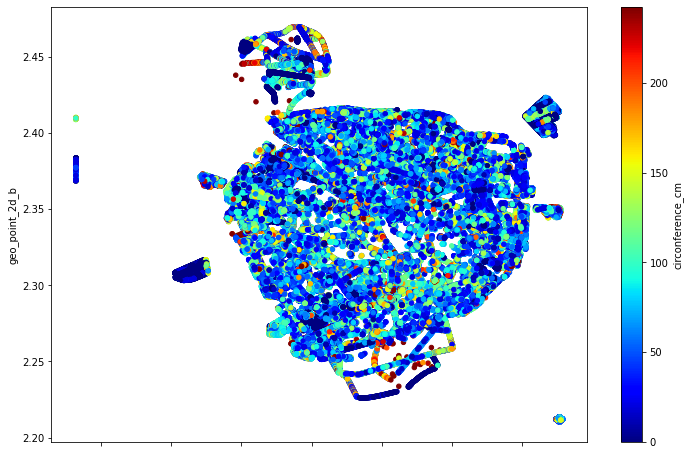

In [ ]:
plt.figure(figsize= (5,5))
df.plot(kind = 'scatter', x = 'geo_point_2d_a', y = 'geo_point_2d_b', c = 'circonference_cm', cmap = plt.get_cmap('jet'), figsize = (12,8))
plt.show()

**Distribution of height:**

<Figure size 360x360 with 0 Axes>

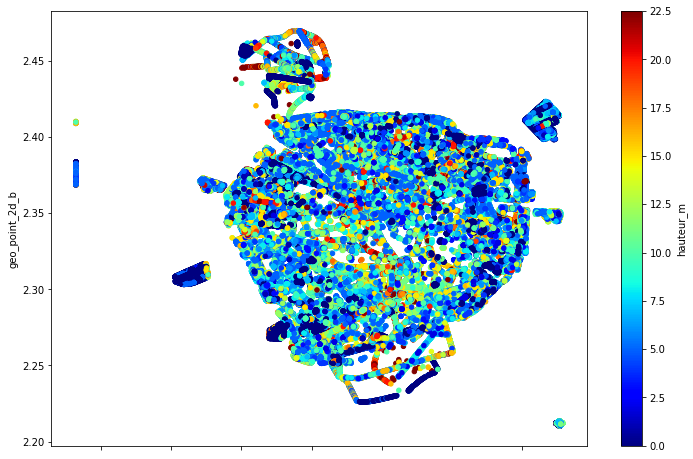

In [ ]:
plt.figure(figsize= (5,5))
df.plot(kind = 'scatter', x = 'geo_point_2d_a', y = 'geo_point_2d_b', c = 'hauteur_m', cmap = plt.get_cmap('jet'), figsize = (12,8))
plt.show()

Distribution of remarkable trees:

<Figure size 360x360 with 0 Axes>

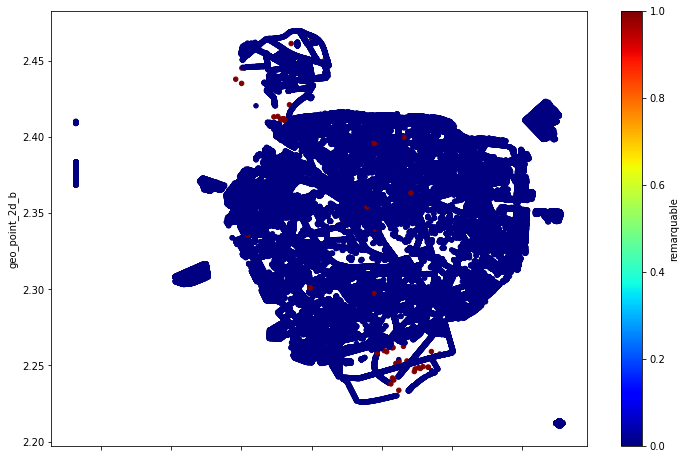

In [ ]:
plt.figure(figsize = (5,5))
df.plot(kind = 'scatter', x = 'geo_point_2d_a', y = 'geo_point_2d_b', c = 'remarquable', cmap = plt.get_cmap('jet'), figsize = (12,8))
plt.show()